前提条件
* T=5.00
* J=1.00, K=0.20(原論文と同様の相互作用の強さ)
* システムサイズをL=10, 20, 30 40, 50

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
import math
from itertools import cycle
warnings.filterwarnings('ignore')
"""
plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
"""

'\nplt.style.use("ggplot")\ncolor_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]\ncolor_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])\n'

In [30]:
def calc_params(data:np.ndarray):
    linear_reg = np.polyfit(data[1:,1], data[1:,0], 1)
    func = np.poly1d(linear_reg)
    y_true = data[1:,0]
    y_pred = func(data[1:,1])
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    tilt = linear_reg[0]
    intercept = linear_reg[1]
    return mae, rmse, tilt

In [31]:
datas = []
L_list = [10, 15 ,20 ,25, 30, 35, 40, 50]
for i in L_list:
    N = i*i
    data = np.loadtxt(f'../output/C/spin_h0.2_L{i}_T5.00_2026.dat')
    #data*= N
    datas.append(data)

In [32]:
mae_list = []
tilt_list = []
rmse_list = []
for data in datas:
    mae, rmse, tilt = calc_params(data)
    mae_list.append(mae)
    rmse_list.append(rmse)
    tilt_list.append(tilt)

In [33]:
#rmse_list
tilt_list

[-1.0736270779451433,
 -1.0707628688003021,
 -1.07293757723373,
 -1.0714661868868744,
 -1.0731903397522915,
 -1.0726368644914799,
 -1.0708013415367768,
 -1.0708465528738946]

In [34]:
accept_list = []
for i in rmse_list:
    p = np.exp(i/5)
    accept_list.append(p)

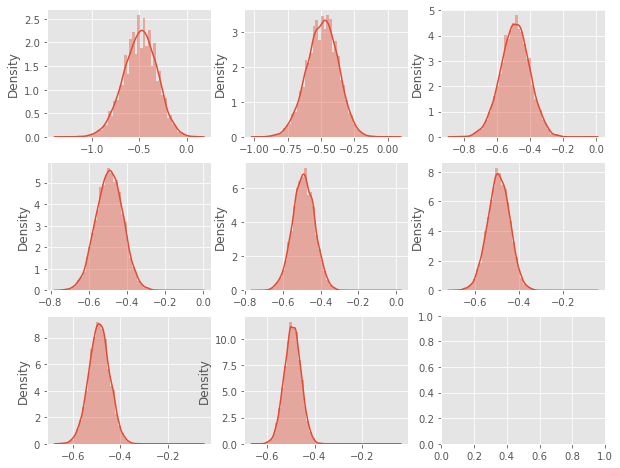

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3,  figsize=(10, 8))
for i, data in enumerate(datas):
    sns.distplot(data[:, 0], ax=axes[math.floor(i/3), i%3])
    

In [48]:
accept_list =[ 0.79999999962288,
 0.479155794653041,
 0.23474130371356142,
 0.11362256354190252,
 0.056626287653655336,
 0.027880360123721977,
 0.014397909576478652,]
L_list = [10, 40, 80, 120, 160, 200, 300]

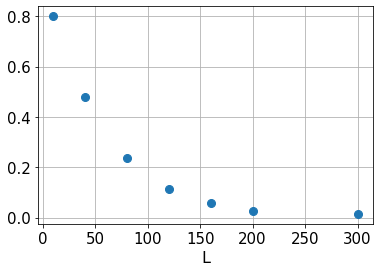

In [59]:
#fig = plt.figure(figsize=(7, 5))
plt.plot(L_list, accept_list, 'o',markersize=8)
plt.xlabel('L', fontsize=16)
#plt.ylabel('Accept ratio', fontsize=16)
#plt.suptitle("accept ratio and system size", fontsize=20)
#plt.xlim(2, 6)
#plt.ylim(0, 50)
plt.tick_params(labelsize = 15)
plt.grid()

IndexError: index 3 is out of bounds for axis 0 with size 3

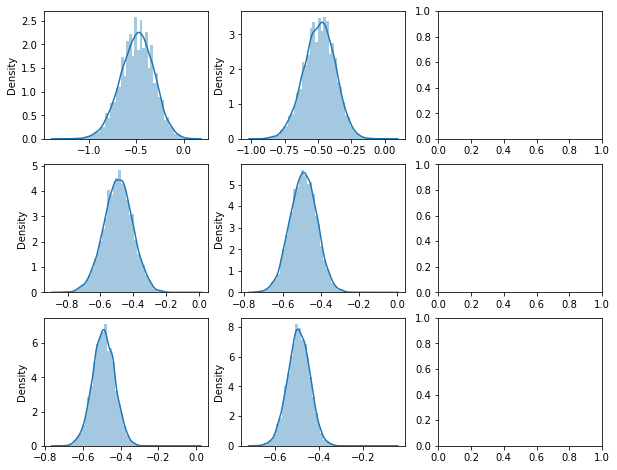

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=3,  figsize=(10, 8))
for i, data in enumerate(datas):
    sns.distplot(data[:, 0], ax=axes[math.floor(i/2), i%2])
    

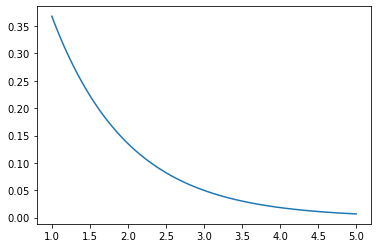

In [40]:
fig = plt.figure()
x = np.linspace(1, 5, 100)
plt.plot(x, np.exp(-x))